In [1]:
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc = pymongo.MongoClient()

survivor_db = mc['survivor_database']

season_collection = survivor_db['season_collection']
player_collection = survivor_db['player_collection']

In [3]:
seasons = pd.DataFrame(list(season_collection.find()))

In [4]:
seasons

,_id,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,5db10a3f12fb7c89dc900c67,Borneo,2,False,16,False,2,False,False,False
1,5db10a3f12fb7c89dc900c68,The Australian Outback,2,False,16,False,2,False,False,False
2,5db10a3f12fb7c89dc900c69,Africa,3,True,16,False,2,False,False,False
3,5db10a3f12fb7c89dc900c6a,Marquesas,2,True,16,False,2,False,False,False
4,5db10a3f12fb7c89dc900c6b,Thailand,2,False,16,False,2,False,False,False
5,5db10a3f12fb7c89dc900c6c,The Amazon,2,True,16,False,2,False,False,False
6,5db10a3f12fb7c89dc900c6d,Pearl Islands,2,False,16,False,2,False,False,True
7,5db10a3f12fb7c89dc900c6e,All-Stars,3,True,18,True,2,False,False,False
8,5db10a3f12fb7c89dc900c6f,Vanuatu,2,True,18,False,2,False,False,False
9,5db10a3f12fb7c89dc900c70,Palau,2,False,20,False,2,False,False,False


In [5]:
seasons.drop('_id', axis=1, inplace=True)
seasons.head()

,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,Borneo,2,False,16,False,2,False,False,False
1,The Australian Outback,2,False,16,False,2,False,False,False
2,Africa,3,True,16,False,2,False,False,False
3,Marquesas,2,True,16,False,2,False,False,False
4,Thailand,2,False,16,False,2,False,False,False


In [6]:
map_columns = ['swap', 'returnee', 'hidden_immunity', 'final_four_fire', 're_entrance']
for col in map_columns:
    seasons[col] = seasons[col].map({True: 1, False: 0})

In [7]:
seasons.head()

,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,Borneo,2,0,16,0,2,0,0,0
1,The Australian Outback,2,0,16,0,2,0,0,0
2,Africa,3,1,16,0,2,0,0,0
3,Marquesas,2,1,16,0,2,0,0,0
4,Thailand,2,0,16,0,2,0,0,0


In [8]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
name                  38 non-null object
num_initial_tribes    38 non-null int64
swap                  38 non-null int64
num_players           38 non-null int64
returnee              38 non-null int64
num_finalist          38 non-null int64
hidden_immunity       38 non-null int64
final_four_fire       38 non-null int64
re_entrance           38 non-null int64
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [9]:
players = pd.DataFrame(list(player_collection.find()))

In [10]:
players.head(10)

,_id,name,age,season,placement,occupation,location,gender,race,returnee
0,5db1081212fb7c89dc9006db,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False
1,5db1081212fb7c89dc9006dc,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False
2,5db1081212fb7c89dc9006dd,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True
3,5db1081212fb7c89dc9006de,Wendy Diaz,25,38,17,Entrepreneur,California,F,Latinx,False
4,5db1081212fb7c89dc9006df,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True
5,5db1081212fb7c89dc9006e0,Eric Hafemann,34,38,13,Firefighter,California,M,Caucasian,False
6,5db1081212fb7c89dc9006e1,Julia Carter,25,38,12,Medical Student,Maryland,F,Black,False
7,5db1081212fb7c89dc9006e2,David Wright,44,38,11,Writer,California,M,Caucasian,True
8,5db1081212fb7c89dc9006e3,Kelley Wentworth,32,38,10,Marketing,Washington,F,Caucasian,True
9,5db1081212fb7c89dc9006e4,"Dan ""Wardog"" DaSilva",38,38,9,Law Student,California,M,Caucasian,False


In [11]:
players.drop('_id', axis=1, inplace=True)

In [12]:
players.head()

,name,age,season,placement,occupation,location,gender,race,returnee
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False
1,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True
3,Wendy Diaz,25,38,17,Entrepreneur,California,F,Latinx,False
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True


In [13]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 9 columns):
name          1382 non-null object
age           1382 non-null int64
season        1382 non-null int64
placement     1382 non-null int64
occupation    1382 non-null object
location      1382 non-null object
gender        1382 non-null object
race          1382 non-null object
returnee      1378 non-null object
dtypes: int64(3), object(6)
memory usage: 97.3+ KB


There is a mistake with two players where their returnee status is not listed. Find and correct them. 

In [14]:
print(players[players['returnee'].isnull()])

               name  age  season  placement      occupation    location  \
303   Russell Hantz   37      22         17  Business Owner       Texas   
529   Willard Smith   56      10         14          Lawyer  Washington   
994   Russell Hantz   37      22         17  Business Owner       Texas   
1220  Willard Smith   56      10         14          Lawyer  Washington   

          gender   race returnee  
303            M   True      NaN  
529   MCaucasian  False      NaN  
994            M   True      NaN  
1220  MCaucasian  False      NaN  


Looks like the race was accidentally dropped/shifted. So need to replace those as well as gender for Willard. Russell in season 22 is a returnee. Willard is not.

In [15]:
players.loc[(players['name'] =='Russell Hantz') & (players['season'] == 22), 'race'] = 'Caucasian'
players.loc[(players['name'] =='Russell Hantz') & (players['season'] == 22), 'returnee'] = 'True'
players.loc[players['name'] =='Willard Smith', 'gender'] = 'M'
players.loc[players['name'] =='Willard Smith', 'race'] = 'Caucasian'
players.loc[players['name'] =='Willard Smith', 'returnee'] = 'False'

Check that the correct changes occured.

In [16]:
players.loc[(players['name'] =='Willard Smith') | (players['name'] =='Russell Hantz')]

,name,age,season,placement,occupation,location,gender,race,returnee
303,Russell Hantz,37,22,17,Business Owner,Texas,M,Caucasian,True
357,Russell Hantz,36,20,3,Business Owner,Texas,M,Caucasian,True
378,Russell Hantz,36,19,2,Business Owner,Texas,M,Caucasian,False
529,Willard Smith,56,10,14,Lawyer,Washington,M,Caucasian,False
994,Russell Hantz,37,22,17,Business Owner,Texas,M,Caucasian,True
1048,Russell Hantz,36,20,3,Business Owner,Texas,M,Caucasian,True
1069,Russell Hantz,36,19,2,Business Owner,Texas,M,Caucasian,False
1220,Willard Smith,56,10,14,Lawyer,Washington,M,Caucasian,False


From creating the data set, I know there are some very uncommon jobs, I want to try to group some of the lower count jobs with larger groups.

In [17]:
dict(players['occupation'].value_counts())

{'Student': 86,
 'Sales': 68,
 'Lawyer': 58,
 'Business Owner': 46,
 'Police': 40,
 'Pro Athlete': 40,
 'Model': 38,
 'Real Estate': 36,
 'Bartender': 36,
 'Fitness': 34,
 'Teacher': 34,
 'Farmer': 32,
 'Firefighter': 30,
 'Law Student': 24,
 'Actor': 22,
 'Physician': 22,
 'Marketing': 22,
 'Coach': 22,
 'Veteran': 20,
 'Nurse': 20,
 'Waiter': 20,
 'Musician': 18,
 'Entrepreneur': 18,
 'Construction': 18,
 'Manager': 14,
 'Engineer': 12,
 'Writer': 12,
 'Consultant': 10,
 'Artist': 10,
 'Finance': 10,
 'Poker Player': 10,
 'Hairstylist': 10,
 'Mentor': 10,
 'Fisher': 8,
 'Motivational Speaker': 8,
 'Social Worker': 8,
 'Advertisting': 8,
 'Medical Student': 8,
 'Mechanic': 8,
 'Homemaker': 8,
 'Social Media': 8,
 'Military': 8,
 'Chef': 8,
 'Animal Trainer': 8,
 'Mailman': 6,
 'Accountant': 6,
 'Chemist': 6,
 'News Anchor': 6,
 'Boxer': 6,
 'Pilot': 6,
 'Dancer': 6,
 'Recruiter': 6,
 'Photographer': 6,
 'Barista': 6,
 'Designer': 6,
 'Surfer': 6,
 'Military Spouse': 6,
 'Wrestler': 4,

Group together different types of guides as adventure guides.

In [18]:
# Test to make sure this method is valid
players['occupation'] = players['occupation'].replace({'Counstruction': 'Construction', 'Oil Driller': 'Construction',
                              'Disposal': 'Construction', 'Maintenance': 'Construction',
                              'Oil Tanker Crewman': 'Construction', 'Electrician': 'Construction',
                              'Lumberjack': 'Construction'})

In [19]:
dict(players['occupation'].value_counts())

{'Student': 86,
 'Sales': 68,
 'Lawyer': 58,
 'Business Owner': 46,
 'Police': 40,
 'Pro Athlete': 40,
 'Model': 38,
 'Bartender': 36,
 'Real Estate': 36,
 'Teacher': 34,
 'Fitness': 34,
 'Farmer': 32,
 'Construction': 32,
 'Firefighter': 30,
 'Law Student': 24,
 'Coach': 22,
 'Actor': 22,
 'Marketing': 22,
 'Physician': 22,
 'Nurse': 20,
 'Waiter': 20,
 'Veteran': 20,
 'Musician': 18,
 'Entrepreneur': 18,
 'Manager': 14,
 'Engineer': 12,
 'Writer': 12,
 'Mentor': 10,
 'Poker Player': 10,
 'Artist': 10,
 'Hairstylist': 10,
 'Finance': 10,
 'Consultant': 10,
 'Chef': 8,
 'Social Worker': 8,
 'Mechanic': 8,
 'Motivational Speaker': 8,
 'Medical Student': 8,
 'Fisher': 8,
 'Military': 8,
 'Advertisting': 8,
 'Social Media': 8,
 'Animal Trainer': 8,
 'Homemaker': 8,
 'Mailman': 6,
 'Boxer': 6,
 'News Anchor': 6,
 'Accountant': 6,
 'Dancer': 6,
 'Surfer': 6,
 'Chemist': 6,
 'Barista': 6,
 'Military Spouse': 6,
 'Photographer': 6,
 'Recruiter': 6,
 'Designer': 6,
 'Pilot': 6,
 'Banker': 4,
 

In [20]:
# first run through of job consolidation
players['occupation'] = players['occupation'].replace({'Dental Student': 'Student', 
                                                       'Hiking Guide': 'Adventure Guide',
                                                       'Survival Instructor': 'Adventure Guide',
                                                       'Wilderness Guide': 'Adventure Guide',
                                                       'River Guide': 'Adventure Guide',
                                                       'Scout Leader': 'Adventure Guide',
                                                       'School Counselor': 'Therapist',
                                                       'Physical Therapist': 'Therapist',
                                                       'Music Therapist': 'Therapist',
                                                       'Nutritionist': 'Therapist',
                                                       'Massage Therapist': 'Therapist',
                                                       'Career Coach': 'Therapist',
                                                       'Hair Stylist': 'Beautician',
                                                      'Cosmetologist': 'Beautician',
                                                      'Hairstylist': 'Beautician',
                                                      'Makeup Artist': 'Beautician',
                                                      'Esthetician': 'Beautician',
                                                      'Stylist': 'Beautician',
                                                      'Showgirl': 'Entertainer',
                                                      'Talk Show Host': 'Entertainer',
                                                      'Comedian': 'Entertainer',
                                                      'Video Gamer': 'Entertainer',
                                                      'Viral Star': 'Entertainer',
                                                      'Musician': 'Entertainer',
                                                      'Dancer': 'Entertainer',
                                                      'Cheerleader': 'Entertainer',
                                                      'Pageant Queen': 'Entertainer',
                                                      'Roller Girl': 'Entertainer',
                                                      'Gamer': 'Entertainer',
                                                      'Broadcast': 'Entertainer',
                                                      'Boxer': 'Entertainer',
                                                      'Radio Host': 'Entertainer',
                                                      'News Anchor': 'Entertainer',
                                                      'Bus Driver': 'Driver',
                                                      'Limo Driver': 'Driver',
                                                      'Bounty Hunter': 'Law Enforcement',
                                                      'Police': 'Law Enforcement',
                                                      'Water Ski Instructor': 'Sport Instructor',
                                                      'Pageant Coach': 'Sport Instructor',
                                                      'Sailor': 'Sport Instructor',
                                                      'Surf Instructor': 'Sport Instructor'})

In [21]:
dict(players['occupation'].value_counts())

{'Student': 88,
 'Sales': 68,
 'Entertainer': 64,
 'Lawyer': 58,
 'Business Owner': 46,
 'Law Enforcement': 42,
 'Pro Athlete': 40,
 'Model': 38,
 'Real Estate': 36,
 'Bartender': 36,
 'Fitness': 34,
 'Teacher': 34,
 'Farmer': 32,
 'Construction': 32,
 'Firefighter': 30,
 'Beautician': 24,
 'Law Student': 24,
 'Actor': 22,
 'Marketing': 22,
 'Physician': 22,
 'Coach': 22,
 'Waiter': 20,
 'Nurse': 20,
 'Veteran': 20,
 'Entrepreneur': 18,
 'Therapist': 14,
 'Manager': 14,
 'Engineer': 12,
 'Writer': 12,
 'Adventure Guide': 12,
 'Artist': 10,
 'Consultant': 10,
 'Finance': 10,
 'Mentor': 10,
 'Poker Player': 10,
 'Fisher': 8,
 'Advertisting': 8,
 'Sport Instructor': 8,
 'Social Worker': 8,
 'Chef': 8,
 'Animal Trainer': 8,
 'Mechanic': 8,
 'Medical Student': 8,
 'Military': 8,
 'Social Media': 8,
 'Homemaker': 8,
 'Motivational Speaker': 8,
 'Pilot': 6,
 'Chemist': 6,
 'Mailman': 6,
 'Designer': 6,
 'Barista': 6,
 'Photographer': 6,
 'Surfer': 6,
 'Military Spouse': 6,
 'Driver': 6,
 'Rec

In [22]:
players['occupation'] = players['occupation'].replace({'Law Student': 'Student', 
                                                       'Actor': 'Entertainer',
                                                       'Entrepreneur': 'Business Owner', 
                                                       'Physician': 'Physician/Dentist', 
                                                       'Social Media': 'Marketing', 
                                                       'Advertisting': 'Marketing', 
                                                       'Nurse': 'Medical Professional', 
                                                       'Fisher': 'Agriculture',
                                                       'Rancher': 'Agriculture',
                                                       'Surfer': 'Sport Instructor',
                                                       'Tech Executive': 'Tech',
                                                       'Software Engineer': 'Tech',
                                                       'Computer Scientist': 'Tech',
                                                       'Missionary': 'Religion',
                                                       'Pastor': 'Religion',
                                                       'Legal Support': 'Law',
                                                      'Wrestler': 'Pro Athlete',
                                                      'FBI': 'Law Enforcement',
                                                      'Truck Driver': 'Driver',
                                                      'Business Consultant': 'Business', 
                                                       'Mortgage Loan Officer': 'Banker', 
                                                       'Career Counselor': 'Therapist',
                                                       'Professor': 'Education',
                                                      'Principal': 'Education',
                                                      'Equity Trade Manager': 'Finance',
                                                       'Judge': 'Law',
                                                      'Bellhop': 'Doorman',
                                                      'Waitress': 'Waiter',
                                                      'Nonprofit Owner': 'Nonprofit',
                                                      'Shopping Center Director': 'Real Estate',
                                                      'Mechanical Bull Operator/Model': 'Model',
                                                      'Loan Manager': 'Banker',
                                                      'Civil Engineer': 'Engineer',
                                                      'Robotics': 'Engineer',
                                                      'Phlebotomist': 'Medical Professional',
                                                      'Dentist': 'Physician/Dentist',
                                                       'Technology Executive': 'Tech',
                                                      'Author': 'Writer',
                                                      'Journalist': 'Writer',
                                                      'Water Treatment Tech': 'Construction',
                                                       'Architect': 'Construction'})

In [23]:
dict(players['occupation'].value_counts())

{'Student': 112,
 'Entertainer': 86,
 'Sales': 68,
 'Business Owner': 64,
 'Lawyer': 58,
 'Law Enforcement': 46,
 'Pro Athlete': 44,
 'Model': 40,
 'Real Estate': 38,
 'Marketing': 38,
 'Bartender': 36,
 'Construction': 36,
 'Fitness': 34,
 'Teacher': 34,
 'Farmer': 32,
 'Firefighter': 30,
 'Beautician': 24,
 'Physician/Dentist': 24,
 'Medical Professional': 22,
 'Coach': 22,
 'Waiter': 22,
 'Veteran': 20,
 'Therapist': 18,
 'Writer': 16,
 'Tech': 16,
 'Engineer': 16,
 'Sport Instructor': 14,
 'Manager': 14,
 'Adventure Guide': 12,
 'Agriculture': 12,
 'Finance': 12,
 'Artist': 10,
 'Consultant': 10,
 'Driver': 10,
 'Mentor': 10,
 'Poker Player': 10,
 'Mechanic': 8,
 'Medical Student': 8,
 'Homemaker': 8,
 'Education': 8,
 'Banker': 8,
 'Motivational Speaker': 8,
 'Animal Trainer': 8,
 'Chef': 8,
 'Military': 8,
 'Religion': 8,
 'Social Worker': 8,
 'Barista': 6,
 'Mailman': 6,
 'Accountant': 6,
 'Photographer': 6,
 'Chemist': 6,
 'Designer': 6,
 'Military Spouse': 6,
 'Business': 6,
 

In [24]:
players['occupation'] = players['occupation'].replace({'Medical Student': 'Student', 
                                                       'Writer': 'Entertainer', 
                                                       'Teacher': 'Education',
                                                       'Farmer': 'Agriculture',
                                                       'Rocket Scientist': 'Engineer',
                                                       'Office Manager': 'Manager',
                                                       'Project Manager': 'Manager',
                                                       'Photographer': 'Artist',
                                                       'Videographer': 'Artist',
                                                       'Producer': 'Artist',
                                                       'Art Consultant': 'Artist',
                                                       'Shoe Designer': 'Designer',
                                                       'Executive': 'Business',
                                                       'Lawyer': 'Law',
                                                       'Account Manager': 'Accountant',
                                                       'Account Executive': 'Accountant',
                                                       'CEO': 'Business',
                                                       'Advocate': 'Mentor',
                                                       'Youth Director': 'Mentor',
                                                       'Program Director': 'Mentor',
                                                       'Steel Worker': 'Construction',
                                                       'Factory Worker': 'Construction',
                                                       'Sports President': 'Business Owner',
                                                       'Produce Clerk': 'Sales',
                                                       'Economics': 'Finance',
                                                       'Naturalist': 'Therapist',
                                                       'Snowboarder': 'Sport Instructor',
                                                       'Actuary': 'Insurance',
                                                       'Administrative Officer': 'Administration',
                                                       'Administrative Assistant': 'Administration',
                                                       'Assistant': 'Administration',
                                                       'Lunch Lady': 'Kitchen Staff',
                                                       'Chef': 'Kitchen Staff',
                                                       'Hedge Fund Support': 'Finance',
                                                       'Merchandiser': 'Buyer',
                                                       'Project Coordinator': 'Manager',
                                                       'Promoter': 'Event Planner'})

In [25]:
dict(players['occupation'].value_counts())

{'Student': 120,
 'Entertainer': 102,
 'Sales': 70,
 'Business Owner': 66,
 'Law': 64,
 'Law Enforcement': 46,
 'Agriculture': 44,
 'Pro Athlete': 44,
 'Education': 42,
 'Construction': 40,
 'Model': 40,
 'Real Estate': 38,
 'Marketing': 38,
 'Bartender': 36,
 'Fitness': 34,
 'Firefighter': 30,
 'Artist': 26,
 'Physician/Dentist': 24,
 'Beautician': 24,
 'Waiter': 22,
 'Manager': 22,
 'Coach': 22,
 'Medical Professional': 22,
 'Therapist': 20,
 'Engineer': 20,
 'Veteran': 20,
 'Mentor': 18,
 'Finance': 16,
 'Sport Instructor': 16,
 'Tech': 16,
 'Kitchen Staff': 12,
 'Business': 12,
 'Adventure Guide': 12,
 'Poker Player': 10,
 'Driver': 10,
 'Accountant': 10,
 'Consultant': 10,
 'Religion': 8,
 'Designer': 8,
 'Mechanic': 8,
 'Banker': 8,
 'Motivational Speaker': 8,
 'Homemaker': 8,
 'Animal Trainer': 8,
 'Social Worker': 8,
 'Military': 8,
 'Mailman': 6,
 'Pilot': 6,
 'Administration': 6,
 'Chemist': 6,
 'Buyer': 6,
 'Recruiter': 6,
 'Military Spouse': 6,
 'Barista': 6,
 'Customer Ser

At this point I believe I have consolidated jobs that are very similar into smaller categories.

In [26]:
occupation_counts = dict(players['occupation'].value_counts())

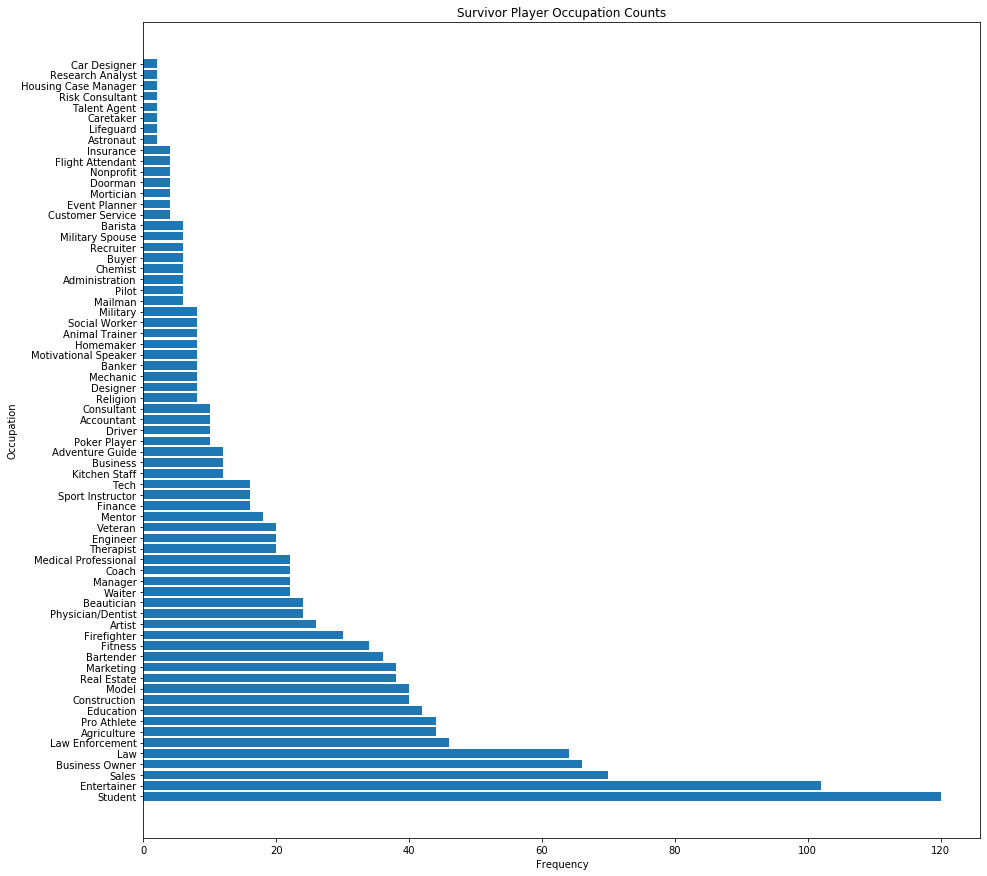

In [27]:
fig = plt.figure(figsize=(15,15))
plt.barh(list(occupation_counts.keys()), list(occupation_counts.values()))
plt.xlabel('Frequency')
plt.ylabel('Occupation')
plt.title('Survivor Player Occupation Counts')
plt.show();

Text(0.5, 1.0, 'Survivor Players by Race')

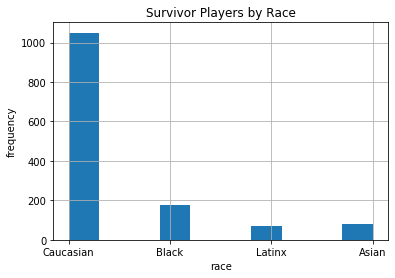

In [28]:
ax = players['race'].hist()
ax.set_xlabel('race')
ax.set_ylabel('frequency')
ax.set_title('Survivor Players by Race')

Text(0.5, 1.0, 'Survivor Players by Gender')

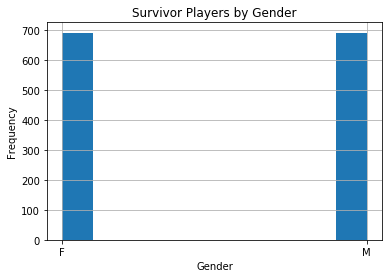

In [29]:
ax = players['gender'].hist()
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title('Survivor Players by Gender')

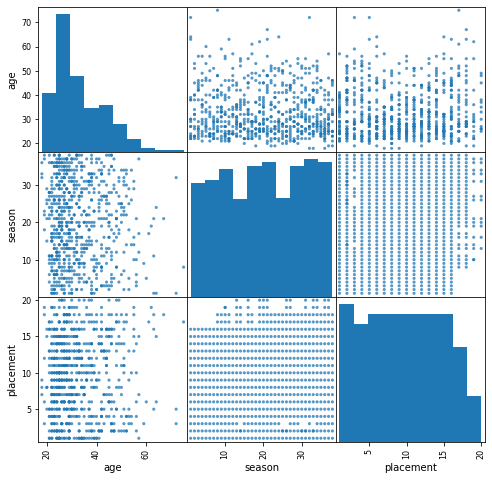

In [30]:
pd.plotting.scatter_matrix(players, figsize=(8,8));

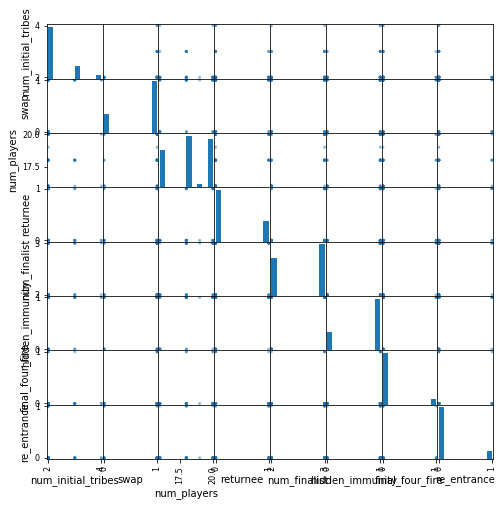

In [31]:
pd.plotting.scatter_matrix(seasons, figsize=(8,8));

Since not every season has the same number of players, the placement rank does not really have a meaning. I will join the dataframes and then adjust the placement to be a value between 0 and 1. Where a 1 indicates being the first voted out (20th out of 20) and a small number (but not zero since it is impossible) indicates a higher placement.

In [32]:
seasons.index += 1
seasons.head()

,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
1,Borneo,2,0,16,0,2,0,0,0
2,The Australian Outback,2,0,16,0,2,0,0,0
3,Africa,3,1,16,0,2,0,0,0
4,Marquesas,2,1,16,0,2,0,0,0
5,Thailand,2,0,16,0,2,0,0,0


In [33]:
players_with_season = players.join(seasons, on='season', rsuffix='_season')

In [34]:
players_with_season.head()

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1
1,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1
3,Wendy Diaz,25,38,17,Business Owner,California,F,Latinx,False,Edge of Extinction,2,1,18,1,3,1,1,1
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1


In [35]:
players_with_season['adjusted_placement'] = players_with_season['placement'] / players_with_season['num_players']
players_with_season.head(10)

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.888889
1,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1,1.000000
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.833333
3,Wendy Diaz,25,38,17,Business Owner,California,F,Latinx,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.944444
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.777778
5,Eric Hafemann,34,38,13,Firefighter,California,M,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.722222
6,Julia Carter,25,38,12,Student,Maryland,F,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.666667
7,David Wright,44,38,11,Entertainer,California,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.611111
8,Kelley Wentworth,32,38,10,Marketing,Washington,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.555556
9,"Dan ""Wardog"" DaSilva",38,38,9,Student,California,M,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.500000


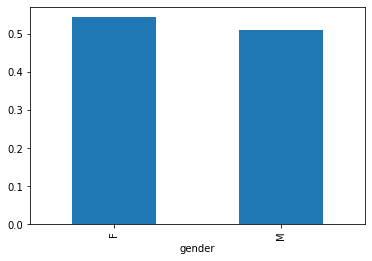

In [36]:
players_with_season.groupby('gender').adjusted_placement.mean().plot(kind='bar')

In [37]:
females = players_with_season.loc[players_with_season['gender']=='F']
females.head()

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.888889
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.833333
3,Wendy Diaz,25,38,17,Business Owner,California,F,Latinx,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.944444
6,Julia Carter,25,38,12,Student,Maryland,F,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.666667
8,Kelley Wentworth,32,38,10,Marketing,Washington,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.555556


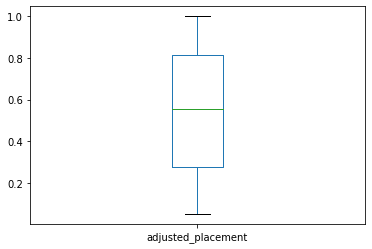

In [38]:
females['adjusted_placement'].plot(kind='box')

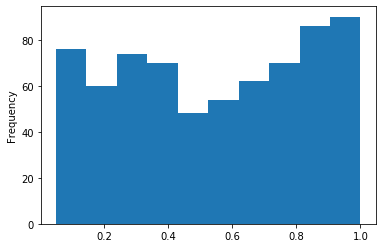

In [39]:
females['adjusted_placement'].plot(kind='hist')

In [40]:
males = players_with_season.loc[players_with_season['gender']=='M']
males.head()

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
1,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1,1.000000
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.777778
5,Eric Hafemann,34,38,13,Firefighter,California,M,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.722222
7,David Wright,44,38,11,Entertainer,California,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.611111
9,"Dan ""Wardog"" DaSilva",38,38,9,Student,California,M,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.500000


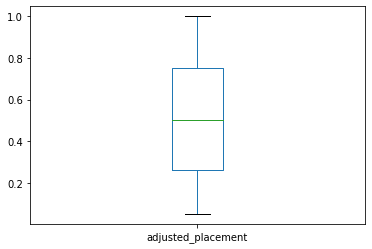

In [41]:
males['adjusted_placement'].plot(kind='box')

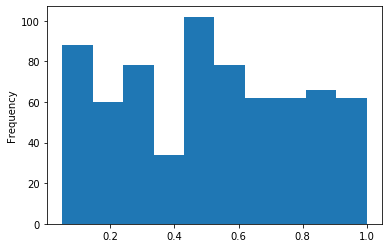

In [42]:
males['adjusted_placement'].plot(kind='hist')

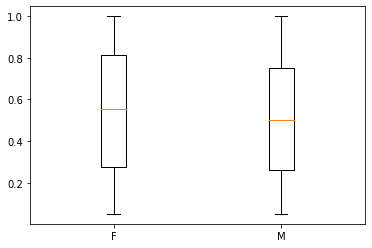

In [43]:
plt.boxplot([females['adjusted_placement'], males['adjusted_placement']], labels=['F', 'M']);

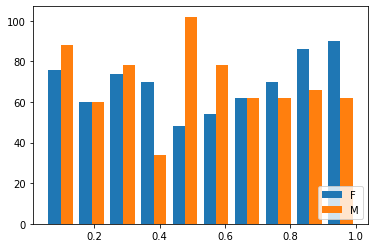

In [44]:
plt.hist([females['adjusted_placement'], males['adjusted_placement']], label=['F','M']);
plt.legend(loc='lower right')

In [45]:
females['adjusted_placement'].mean()

0.5440467412492583

In [46]:
females['adjusted_placement'].std()

0.2956599376571182

In [47]:
males['adjusted_placement'].mean()

0.509942576817767

In [48]:
males['adjusted_placement'].std()

0.2810993572890441

First, remember that being closer to zero indicated a higher placement and that a 1 means an early boot.

Looking at these graphs and numbers. While there is a complete spread for both genders (see the box plots). Females place slightly lower than the males. In addition there is slightly more variation in the females placement.

From the combined histogram we can see that neither gender is normally distributed. This does make sense logically as that would mean nearly all people of a specific gender just get the average placement. It does look as though the women have slightly more early eliminations, and the men have slightly more late eliminations. 

In [55]:
caucasians = players_with_season.loc[players_with_season['race']=='Caucasian']
caucasians.head()

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.888889
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.833333
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.777778
5,Eric Hafemann,34,38,13,Firefighter,California,M,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.722222
7,David Wright,44,38,11,Entertainer,California,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.611111


In [56]:
blacks = players_with_season.loc[players_with_season['race']=='Black']
blacks.head()

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
1,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1,1.000000
6,Julia Carter,25,38,12,Student,Maryland,F,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.666667
20,Jeremy Crawford,40,37,18,Law,New York,M,Black,False,David vs. Goliath,2,1,20,0,3,1,1,0,0.900000
23,Natalie Cole,57,37,15,Business,California,F,Black,False,David vs. Goliath,2,1,20,0,3,1,1,0,0.750000
29,Carl Boudreaux,41,37,9,Driver,Texas,M,Black,False,David vs. Goliath,2,1,20,0,3,1,1,0,0.450000


In [57]:
latinxs = players_with_season.loc[players_with_season['race']=='Latinx']
latinxs.head()

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
3,Wendy Diaz,25,38,17,Business Owner,California,F,Latinx,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.944444
24,Lyrsa Torres,36,37,14,Kitchen Staff,Massachusetts,F,Latinx,False,David vs. Goliath,2,1,20,0,3,1,1,0,0.700000
35,Angelina Keeley,28,37,3,Finance,California,F,Latinx,False,David vs. Goliath,2,1,20,0,3,1,1,0,0.150000
38,Stephanie Gonzalez,26,36,20,Sales,Florida,F,Latinx,False,Ghost Island,2,1,20,0,2,1,1,0,1.000000
81,Sandra Diaz-Twine,41,34,15,Military Spouse,North Carolina,F,Latinx,True,Game Changers,2,1,20,1,3,1,0,0,0.750000


In [58]:
asians = players_with_season.loc[players_with_season['race']=='Asian']
asians.head()

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
21,Bi Nguyen,28,37,17,Pro Athlete,Texas,F,Asian,False,David vs. Goliath,2,1,20,0,3,1,1,0,0.850000
43,James Lim,24,36,15,Business,New York,M,Asian,False,Ghost Island,2,1,20,0,2,1,1,0,0.750000
59,Simone Nquyen,25,35,17,Mentor,New York,F,Asian,False,Heroes vs. Healers vs. Hustlers,3,1,18,0,3,1,1,0,0.944444
92,Tai Trang,52,34,4,Agriculture,California,M,Asian,True,Game Changers,2,1,20,1,3,1,0,0,0.200000
96,Rachel Ako,37,33,20,Recruiter,California,F,Asian,False,Millennials vs. Gen X,2,1,20,0,3,1,0,0,1.000000


,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance,adjusted_placement
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.888889
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.833333
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.777778
5,Eric Hafemann,34,38,13,Firefighter,California,M,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1,0.722222
7,David Wright,44,38,11,Entertainer,California,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1,0.611111


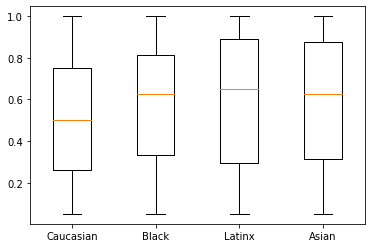

In [60]:
plt.boxplot([caucasians['adjusted_placement'], blacks['adjusted_placement'], 
             latinxs['adjusted_placement'], asians['adjusted_placement']],
             labels=['Caucasian', 'Black', 'Latinx', 'Asian']);

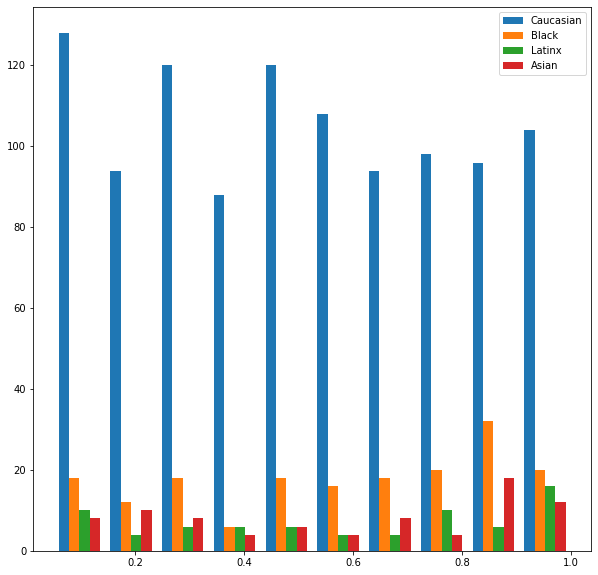

In [65]:
fig = plt.figure(figsize=(10,10))
plt.hist([caucasians['adjusted_placement'], blacks['adjusted_placement'], 
             latinxs['adjusted_placement'], asians['adjusted_placement']],
             label=['Caucasian', 'Black', 'Latinx', 'Asian']);
plt.legend(loc='upper right')